# **Sentiment Analysis on Amazon Reviews**

**A quick comparison between VADER and Roberta**

Dataset: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [ ]:
!pip install -q nltk

## Dataset Visualizing

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape  # 568454 samples

(568454, 10)

In [ ]:
print('sample 1 review:')
print(df['Text'].values[0])
print('sample 1 score:')
print(df['Score'].values[0])

sample 1 review:
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
sample 1 score:
5


Text(0, 0.5, 'Count')

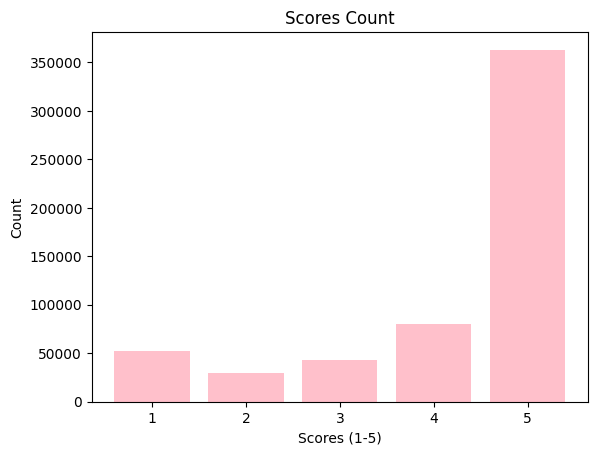

In [ ]:
scores_count = df['Score'].value_counts().sort_index()
plt.bar([1, 2, 3, 4, 5], scores_count, color='pink')
plt.title('Scores Count')
plt.xlabel('Scores (1-5)')
plt.ylabel('Count')

## NLTK

In [ ]:
import nltk
nltk.download('all', quiet=True)

True

In [ ]:
example = df['Text'].values[15]
example

"My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers."

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:8]

['My', 'daughter', 'loves', 'twizzlers', 'and', 'this', 'shipment', 'of']

In [ ]:
pos = nltk.pos_tag(tokens)
pos[:8]

[('My', 'PRP$'),
 ('daughter', 'NN'),
 ('loves', 'VBZ'),
 ('twizzlers', 'NNS'),
 ('and', 'CC'),
 ('this', 'DT'),
 ('shipment', 'NN'),
 ('of', 'IN')]

In [ ]:
chunks = nltk.chunk.ne_chunk(pos)
print(chunks)

(S
  My/PRP$
  daughter/NN
  loves/VBZ
  twizzlers/NNS
  and/CC
  this/DT
  shipment/NN
  of/IN
  six/CD
  pounds/NNS
  really/RB
  hit/VBD
  the/DT
  spot/NN
  ./.
  It/PRP
  's/VBZ
  exactly/RB
  what/WP
  you/PRP
  would/MD
  expect/VB
  .../:
  six/CD
  packages/NNS
  of/IN
  strawberry/NN
  twizzlers/NNS
  ./.)


## Sentiment Analysis with VADER

In [ ]:
# import libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df1 = df[:10000]  # to make the process faster

In [ ]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
  text = row['Text']
  id = row['Id']
  res[id] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df1, how='left')

In [ ]:
# sentiment + data
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

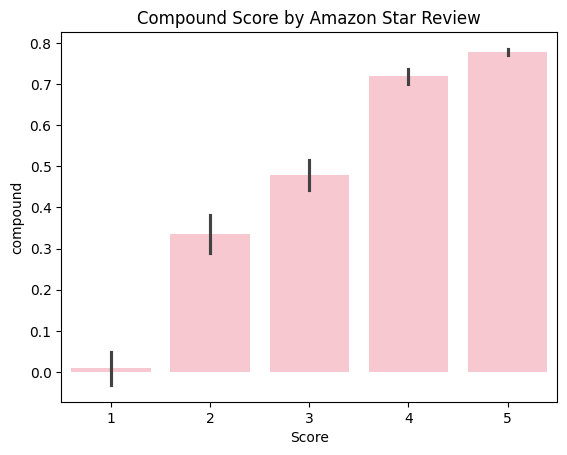

In [ ]:
import seaborn as sns

ax = sns.barplot(data=vaders, x='Score', y='compound', color='pink')
ax.set_title('Compound Score by Amazon Star Review')

Text(0.5, 1.0, 'Negative')

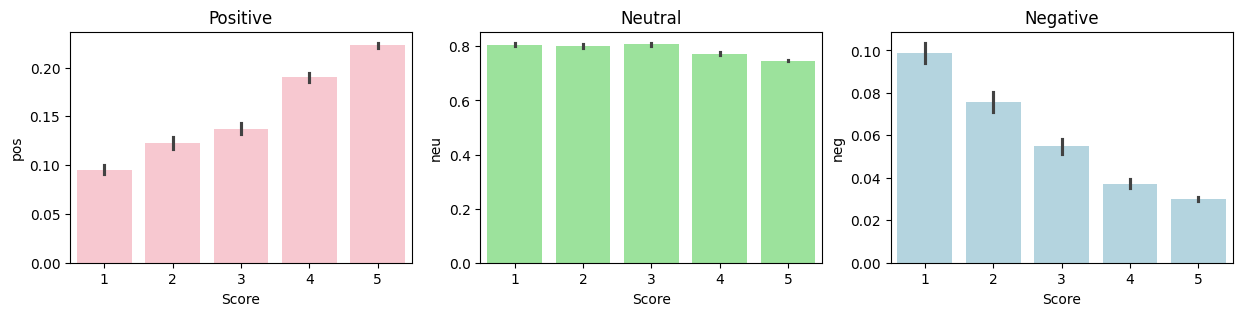

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
ax = sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], color='pink')
ax = sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], color='lightgreen')
ax = sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], color='lightblue')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

## Sentiment Analysis with Roberta

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(f'negative: {scores[0]},  nuetral: {scores[1]},  positive: {scores[2]}')

negative: 0.004562125075608492,  nuetral: 0.032325394451618195,  positive: 0.9631125330924988


In [ ]:
# VADER results on example sample
print(example)
sia.polarity_scores(example)

My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.


{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.5719}

In [ ]:
# real score based on dataset
df['Score'].values[15]  # example variable

np.int64(5)

It seems that the answer of pretrained model of Roberta is more reliable than VADER.